<a href="https://colab.research.google.com/github/lmichan/BIOliteraturaPE203625/blob/main/Enlace_con_Zotero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An√°lisis de la Biblioteca Zotero - Biolog√≠a 2025

Este cuaderno de Google Colab fue desarrollado por Jos√© Antonio Hern√°ndez Mondrag√≥n como parte del proyecto PAPIME PE203625.

El prop√≥sito principal de este c√≥digo es realizar un an√°lisis detallado de la biblioteca Zotero correspondiente al curso de Biolog√≠a 2025, con el fin de extraer informaci√≥n relevante, identificar patrones de uso, tem√°ticas predominantes y apoyar la toma de decisiones en la gesti√≥n y mejora de los recursos bibliogr√°ficos disponibles.

A lo largo del cuaderno se implementan herramientas de procesamiento de datos, visualizaci√≥n y an√°lisis bibliom√©trico para obtener una visi√≥n integral del contenido y estructura de la biblioteca Zotero.

## Conexi√≥n entre Zotero y Google Colab

Para realizar el an√°lisis de la biblioteca de Zotero desde Google Colab, es necesario establecer una conexi√≥n entre ambas plataformas utilizando la Zotero Web API. Esta API permite acceder a colecciones, referencias, metadatos y otros recursos almacenados en una cuenta o grupo de Zotero, lo cual facilita el procesamiento automatizado de los datos.

## Requisitos de configuraci√≥n

Antes de comenzar el an√°lisis, es necesario contar con dos elementos clave:

* Zotero API Key

* Group ID (en caso de trabajar con una biblioteca de grupo)

### 1. Zotero API Key

La API Key es una clave personal que otorga permisos para acceder a la biblioteca Zotero de forma segura. Para obtenerla, sigue estos pasos:

* Accede a tu cuenta en Zotero.org.

* Ve a Settings > Feeds/API.

* En la secci√≥n de API Keys, haz clic en Create new private key.

* Define los permisos de acceso (por ejemplo, lectura) y copia la clave generada.

* Esta clave se utilizar√° en el c√≥digo para autenticar las solicitudes a la API.

### 2. Group ID

Si est√°s trabajando con una biblioteca de grupo, tambi√©n necesitas el identificador √∫nico del grupo. Para obtenerlo:

* Ingresa al sitio de Zotero y selecciona tu grupo.

* El Group ID se encuentra en la URL del grupo. Por ejemplo, en: https://www.zotero.org/groups/1234567/nombre_del_grupo

* El n√∫mero 1234567 es el Group ID que deber√°s usar.


In [1]:
# @title
# CONFIGURA TU CLAVE Y GROUP ID

import requests
from collections import defaultdict, Counter
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

# CONFIGURA TU CLAVE Y GROUP ID (Estos se obtienen en Zotero)
API_KEY = "l7nkDwrKLxASVprKSjbadbXs"
GROUP_ID = "5866354"
HEADERS = {"Zotero-API-Key": API_KEY}


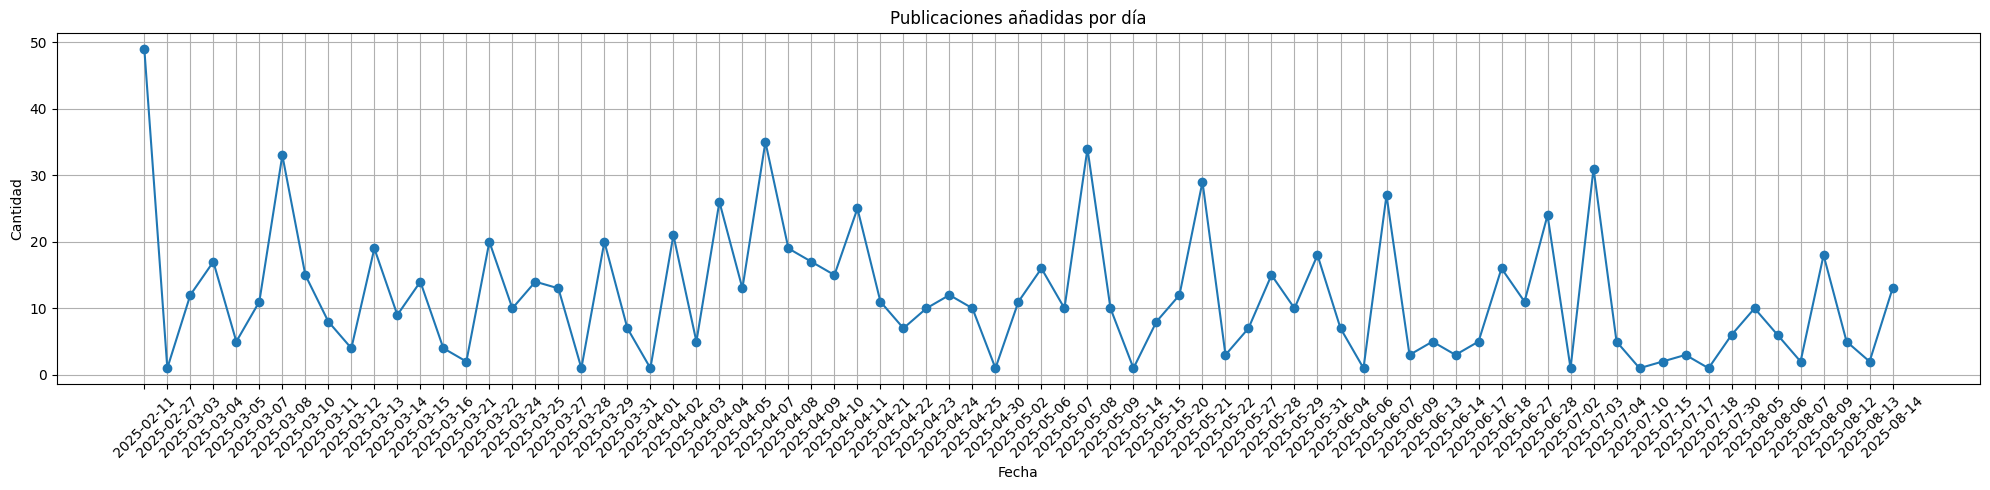

In [4]:
# Descargar √≠tems (paginado si es necesario)
items = []
start = 0
limit = 100

while True:
    url = f"https://api.zotero.org/groups/{GROUP_ID}/items?limit={limit}&start={start}"
    response = requests.get(url, headers=HEADERS)
    data = response.json()

    if not data:
        break

    for item in data:
        if "data" in item:
            items.append({
                "titulo": item["data"].get("title"),
                "fecha": item["data"].get("dateAdded")
            })

    start += limit


df = pd.DataFrame(items)
df["fecha"] = pd.to_datetime(df["fecha"])

# Agrupar por d√≠a
conteo_por_dia = df.groupby(df["fecha"].dt.date).size().reset_index(name="Total_Publicaciones")

# Opcional: convertir fechas a string para exportar
conteo_por_dia["fecha"] = conteo_por_dia["fecha"].astype(str)

# Generamos la grafica de publicaciones a√±adidas por d√≠a
plt.figure(figsize=(20, 5))
plt.plot(conteo_por_dia["fecha"], conteo_por_dia["Total_Publicaciones"], marker='o')
plt.xticks(rotation=45)
plt.title("Publicaciones a√±adidas por d√≠a")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.grid(True)
plt.show()


In [6]:
# Supongamos que ya tienes el DataFrame `df` con una columna "fecha"
# Aseg√∫rate de que sea datetime
df["fecha"] = pd.to_datetime(df["fecha"])

# üîπ Agrupar por semana (esto crea objetos tipo "2025-08-04/2025-08-10")
df["semana"] = df["fecha"].dt.to_period("W").apply(lambda r: r.start_time)

# üîπ Contar publicaciones por semana
conteo_semanal = df.groupby("semana").size().reset_index(name="Total_Publicaciones")

# üîπ Convertir fechas para graficar o exportar
conteo_semanal["semana"] = conteo_semanal["semana"].dt.strftime("%Y-%m-%d")

# Vemos la grafica a nivel semanal
plt.figure(figsize=(10, 5))
plt.plot(conteo_semanal["semana"], conteo_semanal["Total_Publicaciones"], marker='o')
plt.xticks(rotation=45)
plt.title("Publicaciones a√±adidas por semana")
plt.xlabel("Semana")
plt.ylabel("Cantidad")
plt.grid(True)
plt.tight_layout()
plt.show()



/tmp/ipython-input-2958591604.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["semana"] = df["fecha"].dt.to_period("W").apply(lambda r: r.start_time)


In [ ]:
items = []
start = 0
limit = 100  # Zotero limita a 100 √≠tems por solicitud

while True:
    url = f"https://api.zotero.org/groups/{group_id}/items?limit={limit}&start={start}"
    response = requests.get(url, headers=headers)
    data = response.json()

    if not data:
        break

    for item in data:
        d = item["data"]
        items.append({
            "titulo": d.get("title"),
            "tipo": d.get("itemType"),
            "fecha": pd.to_datetime(d.get("dateAdded"), errors="coerce"),
            "doi": d.get("DOI") or d.get("doi"),  # Algunos lo escriben en may√∫sculas
            "url": d.get("url")
        })

    start += limit

# Crear DataFrame
df = pd.DataFrame(items)
print(f"‚úÖ Total de √≠tems descargados: {len(df)}")
df.head()

conteo_tipo = df["tipo"].value_counts().reset_index()
conteo_tipo.columns = ["Tipo de √≠tem", "Cantidad"]
conteo_tipo

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(conteo_tipo["Tipo de √≠tem"], conteo_tipo["Cantidad"], color="skyblue")
plt.xticks(rotation=45, ha='right')
plt.title("üìö Publicaciones por tipo de √≠tem en Zotero")
plt.xlabel("Tipo de √≠tem")
plt.ylabel("Cantidad")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
# Filtramos registros con DOI no nulo y no vac√≠o
con_doi = df["doi"].notnull() & df["doi"].astype(str).str.strip().ne("")

# Conteo
total_con_doi = con_doi.sum()
total_total = len(df)
porcentaje = (total_con_doi / total_total) * 100

print(f"üîç Publicaciones con DOI: {total_con_doi}")
print(f"üì¶ Total de publicaciones: {total_total}")
print(f"üìä Porcentaje con DOI: {porcentaje:.2f}%")


In [ ]:
# Verificamos si la columna existe y no est√° vac√≠a
con_url = df["url"].notnull() & df["url"].astype(str).str.strip().ne("")

# Conteos
total_con_url = con_url.sum()
total_total = len(df)
porcentaje = (total_con_url / total_total) * 100

print(f"üåê Publicaciones con URL: {total_con_url}")
print(f"üì¶ Total de publicaciones: {total_total}")
print(f"üìä Porcentaje con URL: {porcentaje:.2f}%")


In [ ]:
# Publicaciones que tienen DOI o URL
con_doi = df["doi"].notnull() & df["doi"].astype(str).str.strip().ne("")
con_url = df["url"].notnull() & df["url"].astype(str).str.strip().ne("")

ambos = df[con_doi & con_url]
solo_doi = df[con_doi & ~con_url]
solo_url = df[con_url & ~con_doi]
ninguno = df[~con_doi & ~con_url]

print(f"‚úÖ Con ambos: {len(ambos)}")
print(f"üìÑ Solo DOI: {len(solo_doi)}")
print(f"üîó Solo URL: {len(solo_url)}")
print(f"‚ùå Sin DOI ni URL: {len(ninguno)}")


In [ ]:
!pip install pyspellchecker

import pandas as pd
import re
from spellchecker import SpellChecker

# Cargamos tus datos (aseg√∫rate de tener df['titulo'])
spell = SpellChecker(language='es')

# Lista para almacenar t√≠tulos con problemas
problemas = []

# Recorremos los t√≠tulos
for titulo in df["titulo"].dropna():
    errores = []

    # 1. Palabras en may√∫sculas (completamente)
    if any(word.isupper() and len(word) > 1 for word in titulo.split()):
        errores.append("MAY√öSCULAS")

    # 2. Punto final
    if titulo.strip().endswith("."):
        errores.append("PUNTO FINAL")

    # 3. Espacios dobles
    if "  " in titulo:
        errores.append("ESPACIOS DOBLES")

    # 4. Guiones
    if "-" in titulo:
        errores.append("GUIONES")

    # 5. Corchetes
    if "[" in titulo or "]" in titulo:
        errores.append("CORCHETES")

    # 6. S√≠mbolos especiales
    if re.search(r"[@#\$%\^&\*\~\=]", titulo):
        errores.append("S√çMBOLOS ESPECIALES")

    # 7. Faltas de ortograf√≠a
    palabras = re.findall(r'\b\w+\b', titulo.lower())
    errores_ort = spell.unknown(palabras)

    if errores_ort and len(errores_ort) >= 2:  # tolerancia: al menos 2 palabras mal
        errores.append("ORTOGRAF√çA")

    # Guardamos si hay al menos un error
    if errores:
        problemas.append({"titulo": titulo, "errores": ", ".join(errores)})

# Convertimos en DataFrame
df_errores = pd.DataFrame(problemas)
print(f"üîé T√≠tulos problem√°ticos encontrados: {len(df_errores)}")
df_errores.head(10)


In [ ]:
import requests
import pandas as pd
import re

items = []
start = 0
limit = 100

while True:
    url = f"https://api.zotero.org/groups/{group_id}/items?limit={limit}&start={start}"
    response = requests.get(url, headers=headers)
    data = response.json()

    if not data:
        break

    for item in data:
        d = item["data"]
        date_raw = d.get("date", "")

        # Extraer a√±o con regex (si existe un a√±o de 4 d√≠gitos)
        match = re.search(r"\b(1[89]\d{2}|20\d{2}|21\d{2})\b", date_raw)
        year = int(match.group(0)) if match else None

        items.append({
            "titulo": d.get("title"),
            "a√±o": year,
            "tipo": d.get("itemType")
        })

    start += limit

# Crear DataFrame
df = pd.DataFrame(items)
print(f"‚úÖ Total de √≠tems descargados: {len(df)}")
df.head()

conteo_por_anio = df["a√±o"].value_counts().sort_index().reset_index()
conteo_por_anio.columns = ["A√±o", "Cantidad"]
conteo_por_anio = conteo_por_anio[conteo_por_anio["A√±o"].notnull()]  # Filtrar nulos
conteo_por_anio["A√±o"] = conteo_por_anio["A√±o"].astype(int)
conteo_por_anio

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(conteo_por_anio["A√±o"], conteo_por_anio["Cantidad"], color="mediumseagreen")
plt.title("üìÖ Publicaciones por a√±o de publicaci√≥n (Zotero)")
plt.xlabel("A√±o")
plt.ylabel("Cantidad de √≠tems")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [ ]:
from datetime import datetime

anio_actual = datetime.now().year

# Filtramos filas con a√±o v√°lido
df_validos = df[df["a√±o"].notnull()]

# Calculamos edad de cada publicaci√≥n
df_validos["edad"] = anio_actual - df_validos["a√±o"]

# Vemos los primeros
df_validos.head()

edad_promedio = df_validos["edad"].mean()
print(f"La edad promedio de las publicaciones es de {edad_promedio:.2f} a√±os.")

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df_validos["edad"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribuci√≥n de la edad de las publicaciones")
plt.xlabel("Edad (a√±os)")
plt.ylabel("Cantidad de publicaciones")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
